<a href="https://colab.research.google.com/github/Timoha-3000/1st_CUDA_Lab/blob/master/definingTypeButterfly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import shutil
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Параметры изображений и классов
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 75

Загружаем датасеты:

In [4]:
%%capture
!wget -O train.zip https://www.dropbox.com/scl/fi/bel6gt6vsb3onahlxvyjc/train_fix.zip?rlkey=q2wscp6wv9j2hbk07y1mbcm54&dl=0
!wget -O valid.zip https://www.dropbox.com/scl/fi/cwwblwhvqgwubb8a4xg90/valid.zip?rlkey=mow899lvyawq4wku2m8lfvrh3&dl=0
!unzip train.zip -d train/
!unzip valid.zip -d valid/

In [9]:
train_dir = '/content/train/train'
valid_dir = '/content/valid'

def organize_images_by_class(base_folder):
    """
    Раскладывает изображения по папкам классов.
    Класс определяется по имени файла до первой скобки.
    """
    if not os.path.exists(base_folder):
        print(f"Папка {base_folder} не найдена, пропуск...")
        return

    for filename in os.listdir(base_folder):
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue  # Пропускаем не-изображения

        class_name = filename.split('(')[0].strip()
        class_dir = os.path.join(os.path.dirname(base_folder), class_name)
        os.makedirs(class_dir, exist_ok=True)

        src_path = os.path.join(base_folder, filename)
        dst_path = os.path.join(class_dir, filename)
        shutil.move(src_path, dst_path)

    print(f"✅ Готово: {base_folder}")

# Распределяем изображения по папкам классов
folders_to_process = ["train/train/train", "valid/test"]
for folder in folders_to_process:
    organize_images_by_class(folder)

✅ Готово: train/train/train
✅ Готово: valid/test


In [10]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)
valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    "train/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    "valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 9285 images belonging to 76 classes.
Found 750 images belonging to 76 classes.


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # 75 классов
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 15

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator
)

Epoch 1/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 129s 429ms/step - accuracy: 0.0527 - loss: 4.0690 - val_accuracy: 0.2467 - val_loss: 2.9296
Epoch 2/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 121s 415ms/step - accuracy: 0.2738 - loss: 2.7423 - val_accuracy: 0.4280 - val_loss: 2.1699
Epoch 3/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 120s 412ms/step - accuracy: 0.4038 - loss: 2.1508 - val_accuracy: 0.4987 - val_loss: 1.8381
Epoch 4/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 141s 411ms/step - accuracy: 0.4906 - loss: 1.7988 - val_accuracy: 0.5373 - val_loss: 1.5833
Epoch 5/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 122s 418ms/step - accuracy: 0.5399 - loss: 1.6059 - val_accuracy: 0.6027 - val_loss: 1.3326
Epoch 6/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 120s 414ms/step - accuracy: 0.5831 - loss: 1.4124 - val_accuracy: 0.6493 - val_loss: 1.1962
Epoch 7/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 122s 419ms/step - accuracy: 0.6165 - loss: 1.3062 - val_accuracy: 0.6587 - val_loss: 1.2159
Epoch 8/15
291/291 ━━━━━━━━━━━━━━━━━━━━ 118s 407ms/step - accuracy: 0.6460 -

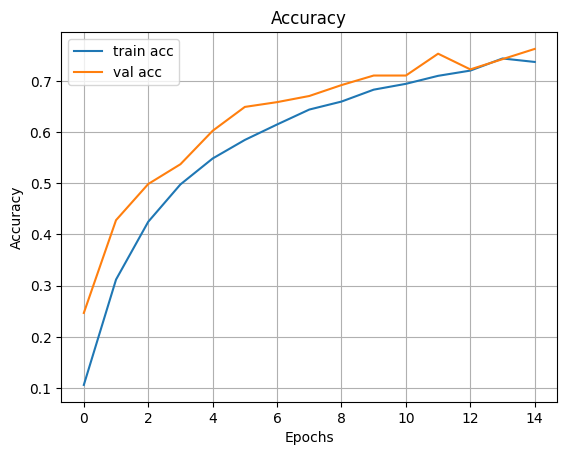

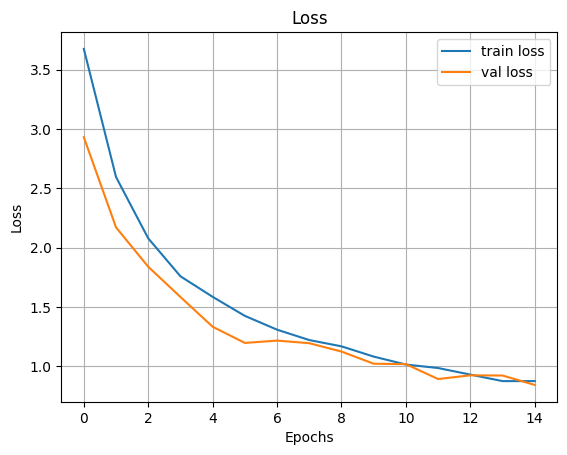

In [13]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import time

start_time = time.time()
loss, accuracy = model.evaluate(valid_generator)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"\nAccuracy на тесте: {accuracy:.4f}")
print(f"Общее время на предсказания: {elapsed_time:.4f} секунд")

24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.7374 - loss: 0.8792

Accuracy на тесте: 0.7400
Общее время на предсказания: 10.8818 секунд
